# Word2Vec

In [238]:
import pandas as pd
import nltk
import re
import gensim
import numpy as np

from fuzzywuzzy import fuzz
from langdetect import detect
from gensim.models import Word2Vec 
from nltk.corpus import stopwords
from pprint import pprint
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

/home/max/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [200]:
source_file = 'data/Googlenews_large.csv'

# Sentiment Analysis

In [217]:
def load_data(source_file):
    df = pd.read_csv(source_file)
    df['text'] = (df['title'] + df['desc']).astype(str)
    return df

def calculate_sentiments(df):
    headlines = [headline for headline in df['text']]
    
    sia = SIA()
    scores = []

    for line in headlines:
        pol_score = sia.polarity_scores(line)
        scores.append(pol_score)
    
    return scores
        
def add_labels(scores):
    labeled_scores = pd.DataFrame.from_records(results)

    labeled_scores['label'] = 0
    labeled_scores.loc[labeled_scores['compound'] > 0.2, 'label'] = 1
    labeled_scores.loc[labeled_scores['compound'] < -0.2, 'label'] = -1
    return labeled_scores

def add_sentiment_scores_to_data(df, labeled_scores):
    sentiments = pd.concat([df, df2], axis=1)
    return sentiments

def calculate_scores(sentiments):
    scores = sentiments.groupby('keyword')['label'].agg(np.mean)
    return scores

In [218]:
df = load_data(source_file)
sentiment_scores = calculate_sentiments(df)
labeled_sentiment_scores = add_labels(sentiment_scores)
sentiments = add_sentiment_scores_to_data(df, labeled_sentiment_scores)
scores = calculate_scores(sentiments)
scores = pd.DataFrame(scores, index=None).reset_index()
print(scores)

                                    keyword     label
0                                        3M  0.322222
1                                A.O. Smith  0.322222
2                                   ABIOMED  0.488889
3                                       AES  0.633333
4                                     AFLAC  0.500000
5                                    AMETEK  0.411111
6                                     ANSYS  0.588889
7                                      AT&T  0.011111
8                                    AbbVie  0.422222
9                       Abbott Laboratories  0.438202
10                                Accenture  0.522222
11                      Activision Blizzard  0.311111
12                                    Adobe  0.444444
13                       Advance Auto Parts  0.244444
14                   Advanced Micro Devices  0.833333
15                     Agilent Technologies  0.400000
16                 Air Products & Chemicals  0.533333
17                      Akam

In [171]:
print("Positive Headlines:")
pprint(list(sentiments[sentiments['label'] == 1].text), width=400)

Positive Headlines:
["3M to Showcase Industry-First 3D Printed PTFE at Formnext3M's proprietary technology combines the powerful benefits of both additive manufacturing and PTFE to open new opportunities for customers. Whether it's ...",
 "Is 3M Oversold At $155?Despite almost an 11% decline in 3M's (NYSE: MMM) stock since the beginning of this year, at the current price of around $155 per share, we believe 3M has a ...",
 'Digital pilots move to production at 3MThe Film and Material Research Division (FMRD), an internal 3M specialty chemical and adhesive supplier, supports five different manufacturing sites and was ...',
 "Continental and 3M to develop new V2I interfacesContinental has a long history in automotive safety systems and its extensive knowledge, combined with 3M's innovative expertise and leadership in roadway ...",
 '3M Reports Fourth-Quarter, Full-Year 2019 Results3M Reports Fourth-Quarter, Full-Year 2019 Results. Full-year sales were $32.1 billion, down 1.9% year-on-yea

 'Ameren Corp (AEE) Q1 2020 Earnings Call TranscriptI would now like to turn the conference over to your host, Mr. Andrew Kirk, Director of Investor Relations for Ameren Corporation. Thank you. You may begin.',
 'Ameren Corporation First Quarter 2020 Earnings Webcast ...LOUIS, April 17, 2020 /PRNewswire/ -- Warner L. Baxter, chairman, president and CEO of Ameren Corp. (NYSE:AEE), will join Michael L. Moehn, executive vice ...',
 'Ameren Illinois to begin natural gas pipeline upgrade in June ...Ameren Illinois announced plans to modernize its natural gas transmission pipeline running through central and southern Illinois with work on a major line in ...',
 "Ameren Missouri to spend $7.6 billion on grid, renewables ...Ameren Missouri's Smart Energy Plan update, filed Wednesday at the Missouri Public Service Commission, also refers to the $1 billion invested in 2019 on grid ...",
 'Ameren Announces Electricity Delivery Rate Decrease For 2020Ameren Illinois residential customers will pay l

 "Boston Properties: 5 Reasons It's The Best Time In 11 Years To Buy The King Of Office REITsBoston Properties: 5 Reasons It's The Best Time In 11 Years To Buy The King Of Office REITs. Jul. 11, 2020 7:00 AM ET. |. | About: ...",
 'Better Buy: Digital Realty vs. Boston PropertiesBoston Properties (NYSE: BXP) and Digital Realty (NYSE: DLR) are two leaders in the REIT sector. Boston Properties is one of the largest office REITs with a ...',
 "Boston's Property Value Has Hit a Record-Breaking HighBoston's Property Value Has Hit a Record-Breaking High. From 2013 to 2019, the total taxable property value reached a historic $164 billion. By Sofia Rivera ...",
 "Is It Time To Consider Buying Boston Properties, Inc. (NYSE:BXP)?Is Boston Properties still cheap? The stock seems fairly valued at the moment according to my valuation model. It's trading around 12.60% above my intrinsic value ...",
 'If You Had Bought Boston Properties (NYSE:BXP) Stock A Year Ago, You Could Pocket A 13% Gain TodayIf

 'Is Now The Time To Put Copart (NASDAQ:CPRT) On Your Watchlist?How Quickly Is Copart Increasing Earnings Per Share? As one of my mentors once told me, share price follows earnings per share (EPS). That means EPS growth ...',
 'Why Copart (CPRT) Stock Might be a Great PickMeanwhile, Copart is actually looking pretty good on its own too. The firm has seen solid earnings estimate revision activity over the past month, suggesting ...',
 "Copart Germany Opens its New Munich East LocationCopart Inc. was founded in 1982 and is a leading global provider of online vehicle auctions. Copart's innovative technology and online auction platform connect ...",
 'Copart Expands Calgary, Alberta Location in Canada"We are extremely pleased with our continued business growth in Alberta," said Copart Canada Managing Director Steve Macaluso. "The increased vehicle ...',
 'IAA at Year 1; Copart at Year 25 as public salvage auction ...Copart chief executive officer Jay Adair began a conference call when the 

 'French group Air Liquide confirms possible sale of German ...Schuelke could be valued at roughly 12-13 times that, sources have told Reuters, adding that Air Liquide is expected to tout the asset to peers such as Ecolab ...',
 'G.E., Which Traces Its Roots to Thomas Edison, Sells Its Lighting BusinessMore than 140 years after Thomas Edison and his assistants conducted their first successful experiments with a carbon-filament lamp in a vacuum, the company ...',
 "Book Review: 'Edison' Is A Lively Story Of The Inventor, If Only You Read It BackwardsBook Review: 'Edison' Is A Lively Story Of The Inventor, If Only You Read It Backwards Throughout his career, Edmund Morris repeatedly showed boredom, ...",
 'Book Review: Genre-bending bio of Thomas Edison is highly ...(AP) -- "Edison," Random House, by Edmund Morris. The late Edmund Morris, a Pulitzer Prize-winning biographer known for his willingness to brush aside the ...',
 'The Real History Behind The Current WarEdison was promoting di

 "Garmin's Edge in the Wearables Fight With Apple? Fighter JetsGarmin's Edge in the Wearables Fight With Apple? Fighter Jets. Apple's watch stumbles versus Garmin's wearable tech; CEO Feinseth attributes their success to ...",
 'Garmin data analysis of the global pandemic: Focused activity increases as people adapt to restrictionsGarmin concludes that people are participating in exercise activities to make up for walking around all day long. My daily Garmin step goal is 8492 and that was set ...',
 'The Best Garmin Fitness Trackers For Keeping Up Your Training Wherever Work Takes YouGarmin has been on the forefront of innovating fitness wearables and they offer some outstanding options for entrepreneurs who like to hit the trail and workout ...',
 "Garmin Instinct reviewThe $299 Garmin Instinct's rugged design, precise GPS mapping and practical battery management make it the best sports watch for most people. For.",
 "Samsung Galaxy Watch vs. Garmin Vivoactive 3: Which should you buy?A

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [161]:
print("Negative Headlines:")
pprint(list(sentiments[sentiments['label'] == -1].text), width=400)

Negative Headlines:
['Lieferung für Berliner Polizei wurde in Thailand zu besserem ...Dabei handelt es sich nach Tagesspiegel-Informationen um den US-Hersteller 3M, der auch in China produziert. Die neue Sprachregelung '
 'der Behörde lautet ...',
 'Innensenator Geisel: 200.000 Schutzmasken für Berlin in die USA "umgeleitet"3M ist einer der größten Anbieter von Atemschutzmasken für Industrie und Gesundheitswesen. Der US-amerikanische '
 'Hersteller lässt seine Masken auch in ...',
 '3M Says No Evidence That Products Have Been Seized3M has no record of any order of respirators from China for the Berlin police. We cannot speculate where this report originated,” the company said '
 'in a statement.',
 '3M to Cut Costs as Business Cools Beyond MasksBy Austen Hufford. 3M Co., maker of coveted N95 face masks used by workers treating coronavirus patients, said sales grew in its medical business '
 'while a ...',
 "3M warns Trump: Halting exports under Defense Production Act would reduce numbe

 'Alliant snags Aon exec for M&A leadershipDan Schoenberg, formerly a senior transaction liability and tax insurance executive at Aon PLC, has joined Alliant Insurance Services Inc. as co-leader of '
 'its ...',
 "Aon investors protected while workers suffer 20% pay cutsA Crain's analysis suggests the 20 percent salary reduction most Aon workers are facing could have been half that if CEO Greg Case had "
 'reduced shareholder ...',
 "Global cyber losses expected to reach $6 trillion by 2021 - Aon“Some companies still don't fully understand the impact a cyberattack can have on a business,” said Onno Janssen, Aon CEO of Risk "
 'Consulting & Cyber ...',
 'Total cat bond issuance surpasses $100bn: Aon SecuritiesAon Securities, the investment banking division of re/insurance broker Aon, has reported that the catastrophe bond sector has now surpassed '
 '$100 billion in ...',
 "Fitch puts Aon on negative watch, citing WTW merger concernsAnalysts said Aon's 'BBB+' Issuer Default Rating (IDR)

 'Presage Announces Collaboration with Bristol-Myers Squibb ...Presage Announces Collaboration with Bristol-Myers Squibb for Phase O Studies of Novel Cancer Agents Utilizing CIVO™ Technology. '
 'Presage Biosciences is ...',
 "Bristol Myers Squibb finally breaks into first-line lung cancer ...It's been a long road for Bristol-Myers Squibb's Opdivo, but the immuno-oncology star finally has a place in the lucrative market "
 'for previously untreated ...',
 "How Does Bristol-Myers Squibb's Valuation Compare To Its ...Bristol-Myers Squibb's (NYSE:BMY) market cap is much lower than some of the large pharmaceuticals companies, including J&J, Merck, and "
 'Pfizer. Despite ...',
 "BMS nets another Opdivo lung cancer win—but it still has to ...It's been a rocky road for Bristol-Myers Squibb's immuno-oncology duo in previously untreated non-small cell lung cancer (NSCLC), but "
 'a new addition to the ...',
 "We Did It! Bristol-Myers Squibb Bans Forced Swim Test | PETAThanks to your hundreds o

 "Cisco Australia reports $16m lossCisco Systems Australia's latest annual report has indicated a $16,118,000 loss for the period ended 27 July 2019, due in part to the local effects of the wider "
 '...',
 'Cisco Systems Stock Downgraded by Goldman Sachs on Slowdown FearsCisco Systems is falling on Thursday, following a downgrade from Goldman Sachs. The bank argues that nervous businesses may not be '
 'as willing to spend, ...',
 'Global Prison Management Systems Market 2020-2024, with ...Global Prison Management Systems Market 2020-2024, with Key Vendor Profiles Including Cisco Systems, Serco Group and Tyler Technologies '
 '...',
 "Cisco earnings: results from the network-gear maker may refresh fears of a tech-spending slowdownCisco's first-quarter results could go a long way toward gauging IT demand among corporate "
 'customers. Cisco Systems Inc. is scheduled to report fiscal ...',
 'Cisco Live Postponed As Company Makes $5M Donation To ...Cisco Systems in the eleventh hour post

 "General's ...",
 'Dover people smuggler jailed - GOV.UKOn the evening of 5 May, Border Force officers at the Port of Dover stopped a Romanian registered minibus that had arrived on a ferry from Dunkirk. The vehicle '
 '...',
 'Dover woman struck and killed in hit-and-run near SmyrnaA Dover woman was struck and killed in a hit-and-run crash over the weekend. Delaware State Police said 30-year-old Ashley Clark was walking '
 'in the left lane ...',
 'Dover woman stopped twice for speeding in 13-minutes ...ROCHESTER — A Dover woman was arrested after being clocked driving 111 mph Saturday shortly after being pulled over earlier that day for '
 'speeding, New ...',
 'Dover Mayor declares State of Emergency, puts curfew into ...Dover, Del. – The city of Dover now has a curfew in effect from 9 PM Sunday to 6 AM Monday, June 1st following a protest that led to '
 'the looting of several stores ...',
 'Multiple Dover homes hit by gunfire overnight - 47abcDOVER, Del. – Dover Police say they a

 "On Equal Pay Day, What Is The Real Gender Pay Gap?The argument suggests that the pay gap is erred because it doesn't take into account the fact that men and women occupy different jobs and roles. "
 'Men are more ...',
 'Delaware Water Gap fire mostly contained after burning 80 acres. Cause still unknown.Delaware Water Gap fire mostly contained after burning 80 acres. Cause still unknown. Updated Feb 25, 2020; '
 'Posted Feb 24, 2020.',
 'Gap Between Black and White Unemployment Widens to Pandemic HighThe gap, which is now at its widest in the pandemic era, rose to 5.4 percentage points from 5.3 points the prior month, according to '
 'data from the Labor ...',
 'Quick Facts About the Gender Wage GapHowever, despite this progress, significant wage gaps between men and women persist—particularly for women of color. So what exactly is the gender wage gap?',
 "HSBC's gender pay gap hits 47% as City split widensMany financial firms are paying the average man almost 25% more than the aver

 "Here's what stresses Midwest consumers mostHuntington Bancshares has released its first Midwest Money Mindset survey. Tristan Navera. By Patty Tascarella – Senior Reporter, ...",
 "As Huntington Bank's net income plunges, here's what Steve Steinour sees coming nextHuntington Bank has been preparing for a potential recession for years. Now it seems, those plans will be put to "
 'the test.',
 "PPP, a pandemic and a recession: What it all means for Huntington BankPPP, a pandemic and a recession: What it all means for Huntington Bank ... of the bank's balance sheet as it continues to "
 'navigate the Covid-19 pandemic.',
 'Huntington Bancshares (HBAN) Expected to Beat Earnings Estimates: What to Know Ahead of Q2 ReleaseThe market expects Huntington Bancshares (HBAN) to deliver a year-over-year decline in earnings on '
 'lower revenues when it reports results for the quarter ...',
 'Huntington Bancshares (HBAN) Q4 Earnings and Revenues Lag EstimatesHuntington Bancshares, which belongs to

 "Victoria’s Secret Owner L Brands To Cut 15% Of Corporate WorkforceL Brands, the parent company of Victoria's Secret and Bath & Body Works, said Tuesday it will slash 15% of its corporate "
 'workforce, making it another major ...',
 "L Brands CEO Les Wexner's future could be at stake as Epstein ties, falling stock haunt Victoria's Secret parentEarlier this year, L Brands CEO Les Wexner admitted his close ties to sex offender "
 'Jeffrey Epstein. Others in power who have admitted such ties are stepping ...',
 "Wexner might depart as L Brands CEO, sell Victoria’s SecretShare. L Brands founder and CEO Leslie H. Wexner is considering stepping down and might sell all or part of the company's struggling "
 "Victoria's Secret brand.",
 "L Brands' downfall reflects death of American mall - Business InsiderL Brands once dominated the American mall. In its heyday in the 1980s and 1990s, the company owned The Limited, Limited Too, "
 'Abercrombie & Fitch, ...',
 "L Brands Bets Its Future on Bat

 "Merck adopts 'error catastrophe' coronavirus drugMerck is launching its hunt for a coronavirus treatment with a pill developed by US academics that is designed to force an “error catastrophe” on "
 'viruses.',
 "ASCO: Merck steps up to challenge Roche with big Keytruda ...Merck will take on Roche's Tecentriq if Keytruda can score an FDA green light in previously untreated metastatic triple-negative breast "
 'cancer. (Merck).',
 'Merck and Eisai Receive Complete Response Letter for ...Merck and Eisai are continuing to evaluate the KEYTRUDA plus LENVIMA combination across 13 different tumor types in 18 clinical trials, '
 'including the LEAP ...',
 'Merck teams up with cancer startup Foghorn in $425M dealTwo years after its official launch, next-gen cancer biotech Foghorn Therapeutics has nabbed a biobucks deal with Big Pharma Merck. The '
 'Cambridge ...',
 'Merck, Samsung join newly crowded market for Herceptin ...Dive Brief: Merck & Co. on Wednesday announced the U.S. launch of Ont

 'believed to be ...',
 'Omnicom says COVID-19 may have material impact on operations and liquidityOmnicom Group Inc. OMC, +0.31% said Wednesday the coronavirus that causes COVID-19 that has forced many people to stay at '
 'home is likely to hurt revenue, ...',
 "Omnicom Weak As Ad Spending CutOmnicom's stock has declined nearly 29% this year (as of June 17, 2020), reflecting weakness in advertising as companies across industries cut back on spending ...",
 "Publicis is struggling, but it's not a sign of deeper problems with ad agencies, say analystsBut analysts said Publicis' issues are mostly it's own, not a sign of doom for competitors WPP, IPG and "
 'Omnicom.',
 "Omnicom Group's senior leaders take pay cut, implements ...Omnicom Group's CEO John Wren is waiving 100% of his salary and the group is reducing the salaries of its senior leadership team by "
 'approximately a third as ...',
 "Omnicom Group (NYSE:OMC) Seems To Use Debt Quite SensiblyOmnicom Group (NYSE:OMC) Seems To Use

 'which are ...',
 'Why Royal Caribbean, Norwegian Cruise Are Trading Lower ...Barclays downgraded Royal Caribbean Cruises from Overweight to Equal-Weight and lowered its price target from $55 to $50. Cruise liners '
 'have been hit hard by ...',
 'Cruise company bans passenger for life after she ‘recklessly’ stands on railing for a photoCruise company Royal Caribbean said this week it has banned a passenger for life after she was spotted '
 '“recklessly” standing on a balcony railing for a picture.',
 'Grandfather of 1-year-old who fell to her death from Royal Caribbean cruise ship to plead guiltyChloe died July 2019 as she vacationed with her family aboard the Freedom of the Seas of Royal '
 'Caribbean Cruises. Anello has said he did not know the window ...',
 'Couple sues Royal Caribbean after sustaining severe burns in deadly New Zealand volcano eruptionMUST WATCH. Many dead after volcano erupts in New Zealand 01:30. (CNN) A Virginia couple is suing '
 'Royal Caribbean Cruises and 

 "UDR man murdered for ‘ethnic and sectarian reasons’ as he delivered potatoes to friendUDR man murdered for 'ethnic and sectarian reasons' as he delivered potatoes to friend. Tributes have been "
 'paid to a member of the Ulster Defence Regiment ...',
 'UDR Q2 FFO trails consensus; July rent collections consistent with Q2UDR (NYSE:UDR) Q2 earnings failed to meet the consensus estimate that had already been lowered. UDR slips 0.8%. The apartment '
 'REIT posted Q2 FFO per ...',
 "Boyle's Bar victims' relatives were told UDR man was suspectRELATIVES of IRA men killed by loyalists in Co Tyrone were told that a named member of the UDR was a suspect. Republicans Malcolm Nugent "
 '(20), Dwayne ...',
 'State papers: Government frustrated at inaction over UDR criminalitySenior figures in the Irish government, including taoiseach Charles Haughey, berated the British government for failing to '
 'reform the UDR, whose members were ...',
 'UDR ends talks with Rizk about Mack-Cali transaction7, 

 "Fortnite Season 3 Week 1 Challenges: How to deal damage within 10s of landing from the WhirlpoolYou'll have to dive into the Whirlpool at Hydro 16, then land close to an opposing player to injure "
 'him within 10s of landing. Map. Fortnite. In the first few days after ...',
 "Whirlpool Loses $50 Million Tax Fight Over Foreign IncomeThe IRS correctly increased U.S.-based Whirlpool Financial Corp.'s taxable income by nearly $50 million because the income that Whirlpool's "
 'Swiss subsidiary ...',
 'Williams Companies: What Could Lift Its Ailing Stock?Williams Companies (WMB) stock fell for the seventh consecutive day on Wednesday and closed almost at an 11-month low. Midstream stocks are '
 'trading weak ...',
 "The Williams Companies Adopts a Poison PillThe Williams Companies Adopts a Poison Pill · Fearing a takeover after to massive decline in the company's stock price, the natural gas pipeline stock "
 'just made ...',
 'New Jersey DEP denies permits sought for NESE pipeline proje

In [243]:
firms = pd.read_csv('data/firm_raw_regex_match.csv')
firms.rename(columns={'processed': 'keyword'}, inplace=True)
firms

keyword  \
0                                        3M   
1                       Abbott Laboratories   
2                                    AbbVie   
3                                 Accenture   
4                       Activision Blizzard   
5                                     Adobe   
6                        Advance Auto Parts   
7                                       AES   
8                                     AFLAC   
9                      Agilent Technologies   
10                 Air Products & Chemicals   
11                      Akamai Technologies   
12                                Albemarle   
13                  Alexion Pharmaceuticals   
14                           Alliant Energy   
15                                 Allstate   
16                                 Alphabet   
17                                   Altria   
18                               Amazon.com   
19                                   Ameren   
20                        American Airlines   
21                  American Electric Power   
22                      American Express Co   
23                   American International   
24                     American Water Works   
25                     Ameriprise Financial   
26                        AmerisourceBergen   
27                                   AMETEK   
28                                    Amgen   
29                                 Amphenol   
30                                   Anthem   
31                                      Aon   
32                               A.O. Smith   
33                                   Apache   
34        Apartment Investment & Management   
35                                    Apple   
36                                Aptiv PLC   
37                Archer-Daniels-Midland Co   
38                          Arista Networks   
39                    Arthur J. Gallagher &   
40                                 Assurant   
41                                     AT&T   
42                             Atmos Energy   
43                Automatic Data Processing   
44                                 AutoZone   
45                    AvalonBay Communities   
46                           Avery Dennison   
47                                     Ball   
48                          Bank of America   
49              The Bank of New York Mellon   
50                     Baxter International   
51                         Becton Dickinson   
52                                 Best Buy   
53                     Bio-Rad Laboratories   
54                                   Biogen   
55                                BlackRock   
56                                   Boeing   
57                                  Booking   
58                               BorgWarner   
59                        Boston Properties   
60                        Boston Scientific   
61                     Bristol-Myers Squibb   
62                                 Broadcom   
63           Broadridge Financial Solutions   
64                           C. H. Robinson   
65                          Cabot Oil & Gas   
66                            Campbell Soup   
67                    Capital One Financial   
68                          Cardinal Health   
69                                   Carmax   
70                                 Carnival   
71                              Caterpillar   
72                      Cboe Global Markets   
73                                     CBRE   
74                                 Celanese   
75                                  Centene   
76                       CenterPoint Energy   
77                              CenturyLink   
78                                   Cerner   
79                            CF Industries   
80                           Charles Schwab   
81                   Charter Communications   
82                                  Chevron   
83                   Chipotle Mexican Grill   
84                            Chubb Limit

In [235]:
def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

In [239]:
for name in scores['keyword']:
    if match_name(name, firms['processed'].to_list())[1] > 75:
        name = match_name(name, firms['processed'].to_list())[0]

scores

keyword     label  \
0                                        3M  0.322222   
1                                A.O. Smith  0.322222   
2                       Abbott Laboratories  0.438202   
3                                    AbbVie  0.422222   
4                                   ABIOMED  0.488889   
5                                 Accenture  0.522222   
6                       Activision Blizzard  0.311111   
7                                     Adobe  0.444444   
8                        Advance Auto Parts  0.244444   
9                    Advanced Micro Devices  0.833333   
10                                      AES  0.633333   
11                                    AFLAC  0.500000   
12                     Agilent Technologies  0.400000   
13                 Air Products & Chemicals  0.533333   
14                      Akamai Technologies  0.511111   
15                               Alaska Air  0.111111   
16                                Albemarle  0.122222   
17          Alexandria Real Estate Equities  0.352273   
18                  Alexion Pharmaceuticals  0.366667   
19                         Align Technology  0.533333   
20                                 Allegion  0.622222   
21                           Alliant Energy  0.866667   
22                                 Allstate  0.133333   
23                                 Alphabet  0.411111   
24                                   Altria  0.206897   
25                               Amazon.com  0.206897   
26                                    Amcor  0.511111   
27                                   Ameren  0.444444   
28                        American Airlines -0.055556   
29                  American Electric Power  0.388889   
30                      American Express Co  0.382022   
31                   American International  0.044444   
32                           American Tower  0.488889   
33                     American Water Works  0.344444   
34                     Ameriprise Financial  0.733333   
35                        AmerisourceBergen  0.200000   
36                                   AMETEK  0.411111   
37                                    Amgen  0.355556   
38                                 Amphenol  0.333333   
39                          Analog Devices,  0.411111   
40                                    ANSYS  0.588889   
41                                   Anthem  0.144444   
42                                      Aon  0.177778   
43                                   Apache -0.011111   
44        Apartment Investment & Management  0.422222   
45                                    Apple  0.355556   
46                        Applied Materials  0.433333   
47                                Aptiv PLC  0.488889   
48                Archer-Daniels-Midland Co  0.455556   
49                          Arista Networks  0.344444   
50                    Arthur J. Gallagher &  0.133333   
51                                 Assurant  0.577778   
52                                     AT&T  0.011111   
53                             Atmos Energy  0.877778   
54                                 Autodesk  0.411111   
55                Automatic Data Processing  0.388889   
56                                 AutoZone -0.011111   
57                    AvalonBay Communities  0.288889   
58                           Avery Dennison  0.566667   
59                          Baker Hughes Co  0.066667   
60                                     Ball  0.266667   
61                          Bank of America  0.311111   
62                     Baxter International  0.477778   
63                         Becton Dickinson  0.277778   
64                       Berkshire Hathaway  0.233333   
65                                 Best Buy  0.944444   
66                     Bio-Rad Laboratories  0.188889   
67                                   Biogen  0.166667   
68                                BlackRock  0.300000   
69                                   Boeing -0

In [244]:
merged = firms.merge(scores, on='keyword')
merged

keyword  \
0                                        3M   
1                       Abbott Laboratories   
2                                    AbbVie   
3                                 Accenture   
4                       Activision Blizzard   
5                                     Adobe   
6                        Advance Auto Parts   
7                                       AES   
8                                     AFLAC   
9                      Agilent Technologies   
10                 Air Products & Chemicals   
11                      Akamai Technologies   
12                                Albemarle   
13                  Alexion Pharmaceuticals   
14                           Alliant Energy   
15                                 Allstate   
16                                 Alphabet   
17                                   Altria   
18                               Amazon.com   
19                                   Ameren   
20                        American Airlines   
21                  American Electric Power   
22                      American Express Co   
23                   American International   
24                     American Water Works   
25                     Ameriprise Financial   
26                        AmerisourceBergen   
27                                   AMETEK   
28                                    Amgen   
29                                 Amphenol   
30                                   Anthem   
31                                      Aon   
32                               A.O. Smith   
33                                   Apache   
34        Apartment Investment & Management   
35                                    Apple   
36                                Aptiv PLC   
37                Archer-Daniels-Midland Co   
38                          Arista Networks   
39                    Arthur J. Gallagher &   
40                                 Assurant   
41                                     AT&T   
42                             Atmos Energy   
43                Automatic Data Processing   
44                                 AutoZone   
45                    AvalonBay Communities   
46                           Avery Dennison   
47                                     Ball   
48                          Bank of America   
49              The Bank of New York Mellon   
50                     Baxter International   
51                         Becton Dickinson   
52                                 Best Buy   
53                     Bio-Rad Laboratories   
54                                   Biogen   
55                                BlackRock   
56                                   Boeing   
57                                  Booking   
58                               BorgWarner   
59                        Boston Properties   
60                        Boston Scientific   
61                     Bristol-Myers Squibb   
62                                 Broadcom   
63           Broadridge Financial Solutions   
64                           C. H. Robinson   
65                          Cabot Oil & Gas   
66                            Campbell Soup   
67                    Capital One Financial   
68                          Cardinal Health   
69                                   Carmax   
70                                 Carnival   
71                              Caterpillar   
72                      Cboe Global Markets   
73                                     CBRE   
74                                 Celanese   
75                                  Centene   
76                       CenterPoint Energy   
77                              CenturyLink   
78                                   Cerner   
79                            CF Industries   
80                           Charles Schwab   
81                   Charter Communications   
82                                  Chevron   
83                   Chipotle Mexican Grill   
84                            Chubb Limit

In [245]:
import matplotlib.pyplot as plt  
%matplotlib inline

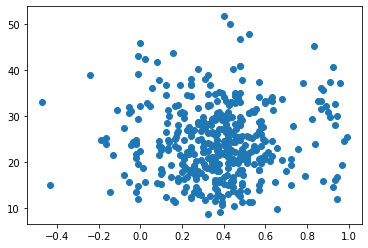

In [252]:
plt.scatter(merged['label'].to_list(), merged['totalEsg'].to_list())
plt.show()

# Google Search Result Analysis

In [280]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import random

In [281]:
def get_number_of_search_results(search_term):
    headers = [{"User-Agent": "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36"}, {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"}, {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:24.0) Gecko/20100101 Firefox/24.0"}, , {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36"}, {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36"}, {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36"}]
    URL     = "https://www.google.com/search?q="+search_term
    result = requests.get(URL, headers=headers[random.randrange(len(headers))])    
    
    soup = BeautifulSoup(result.content, 'html.parser')
    
    total_results_text = soup.find("div", {"id": "result-stats"}).find(text=True, recursive=False) # this will give you the outer text which is like 'About 1,410,000,000 results'
    results_num = ''.join([num for num in total_results_text if num.isdigit()]) # now will clean it up and remove all the characters that are not a number .
    print(search_term + ": " + results_num)
    return results_num

def scrape_search_results(results, keywords):
    for index, row in results.iterrows():
        sleep(random.uniform(10,20))
        results.loc[index, 'total'] = get_number_of_search_results(row[0])
        for word in keywords:
            sleep(random.uniform(0, 3))
            results.loc[index, word] = get_number_of_search_results(row[0] + " " + word)
    return results

In [285]:
google_search_data = pd.read_csv('data/name_ticker_topics.csv', index_col=0)
keywords = google_search_data.columns[1:]
google_search_data = scrape_search_results(google_search_data, keywords)
google_search_data

3M: 699000000
3M scandal: 26000000
3M greenwashing: 109000
3M corruption: 4900000
3M fraud: 27700000
3M bribe: 1800000
3M tax: 88400000
3M forced: 108000000
3M harassment: 14300000
3M violation: 15200000
3M rights: 556000000
3M conflict: 23600000
3M weapons: 11700000
3M arms: 44600000
3M pollution: 50700000
3M CO2: 33100000
3M emission: 24400000
3M fossil: 19800000
3M inequality: 2900000
3M discrimination: 4900000
3M sexism: 1180000
3M racist: 3770000
3M intransparent: 6220000
3M data: 377000000
3M lawsuit: 3320000
3M unfair: 2880000
3M bad: 164000000
3M problem: 239000000
3M hate: 23800000
3M issues: 207000000
3M controversial: 5840000
3M green: 606000000
3M sustainable: 32500000
3M positive: 115000000
3M best: 874000000
3M good: 735000000
3M social: 347000000
3M charity: 29400000
3M ethical: 5320000
3M renewable: 15300000
3M neutral: 49400000
Abbott Laboratories: 30000000
Abbott Laboratories scandal: 1680000
Abbott Laboratories greenwashing: 293000
Abbott Laboratories corruption: 191

KeyboardInterrupt: 

In [286]:
google_search_data

firm_name   scandal greenwashing  \
MMM                                        3M  26000000       109000   
ABT                       Abbott Laboratories   1680000       293000   
ABBV                                   AbbVie    518000        49200   
ABMD                                  ABIOMED       NaN          NaN   
ACN                                 Accenture       NaN          NaN   
ATVI                      Activision Blizzard       NaN          NaN   
ADBE                                    Adobe       NaN          NaN   
AMD                    Advanced Micro Devices       NaN          NaN   
AAP                        Advance Auto Parts       NaN          NaN   
AES                                       AES       NaN          NaN   
AFL                                     AFLAC       NaN          NaN   
A                        Agilent Technologies       NaN          NaN   
APD                  Air Products & Chemicals       NaN          NaN   
AKAM                      Akamai Technologies       NaN          NaN   
ALK                                Alaska Air       NaN          NaN   
ALB                                 Albemarle       NaN          NaN   
ARE           Alexandria Real Estate Equities       NaN          NaN   
ALXN                  Alexion Pharmaceuticals       NaN          NaN   
ALGN                         Align Technology       NaN          NaN   
ALLE                                 Allegion       NaN          NaN   
LNT                            Alliant Energy       NaN          NaN   
ALL                                  Allstate       NaN          NaN   
GOOGL                                Alphabet       NaN          NaN   
GOOG                                 Alphabet       NaN          NaN   
MO                                     Altria       NaN          NaN   
AMZN                                   Amazon       NaN          NaN   
AMCR                                    Amcor       NaN          NaN   
AEE                                    Ameren       NaN          NaN   
AAL                         American Airlines       NaN          NaN   
AEP                   American Electric Power       NaN          NaN   
AXP                          American Express       NaN          NaN   
AIG                    American International       NaN          NaN   
AMT                            American Tower       NaN          NaN   
AWK                      American Water Works       NaN          NaN   
AMP                      Ameriprise Financial       NaN          NaN   
ABC                         AmerisourceBergen       NaN          NaN   
AME                                    AMETEK       NaN          NaN   
AMGN                                    Amgen       NaN          NaN   
APH                                  Amphenol       NaN          NaN   
ADI                            Analog Devices       NaN          NaN   
ANSS                                    ANSYS       NaN          NaN   
ANTM                                   Anthem       NaN          NaN   
AON                                       Aon       NaN          NaN   
AOS                                A.O. Smith       NaN          NaN   
APA                                    Apache       NaN          NaN   
AIV         Apartment Investment & Management       NaN          NaN   
AAPL                                    Apple       NaN          NaN   
AMAT                        Applied Materials       NaN          NaN   
APTV                                Aptiv PLC       NaN          NaN   
ADM                    Archer-Daniels-Midland       NaN          NaN   
ANET                          Arista Networks       NaN          NaN   
AJG                       Arthur J. Gallagher       NaN          NaN   
AIZ                                  Assurant       NaN          NaN   
T                                        AT&T       NaN          NaN   
ATO                              Atmos Energy       NaN          NaN   
ADSK

### Request code snippet test

In [41]:
class MockRequest():
    fail = True
    
    def request_fail_at_seven_once(self, i):
        if i == 7 and self.fail:
            self.fail = False
            raise Exception
        else:
            return i
    
    def request_fail_at_seven_always(self, i):
        if i == 7:
            raise Exception
        else:
            return i
    
    def request_fail_at_3_and_7_once(self, i):
        if (i == 3 or i == 7) and self.fail:
            self.fail = False
            raise Exception
        if i == 3 and not self.fail:
            self.fail = True
            return i
        else:
            return i
        
    
    def reset():
        self.fail = True

In [43]:
def simulate_failed_query(lst=[i for i in range(10)], 
                          max_retries=5, idx_unsuccessful=[]):
    """Simulate a failed query and handle raised exceptions
    
    Input
        lst: list with integers
        max_retries: number of maximum retries
        
    Return
        Inidces where max retries were reached
    """
    mock_request = MockRequest()
    
    for i in lst:
        for attempt in range(max_retries):
            try:
                response = mock_request.request_fail_at_3_and_7_once(i)
                print(f"response: {response} \tattempt: {attempt}")
            except Exception as e:
                print(e)
                print(f"\n>>>EXCEPTION AT {i} --> RETRY {attempt}. time\n")
            else:
                print("Attempt successful")
                break
        else:
            print(f"i: {i} MAX RETRIES reached. Abort and append to idx_unsuccessful!!!\n")
            idx_unsuccessful.append(i)
            break
    
    return idx_unsuccessful


print(*simulate_failed_query())

response: 0 	attempt: 0
Attempt successful
response: 1 	attempt: 0
Attempt successful
response: 2 	attempt: 0
Attempt successful


>>>EXCEPTION AT 3 --> RETRY 0. time

response: 3 	attempt: 1
Attempt successful
response: 4 	attempt: 0
Attempt successful
response: 5 	attempt: 0
Attempt successful
response: 6 	attempt: 0
Attempt successful


>>>EXCEPTION AT 7 --> RETRY 0. time

response: 7 	attempt: 1
Attempt successful
response: 8 	attempt: 0
Attempt successful
response: 9 	attempt: 0
Attempt successful

